## Part 4: Modeling

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sktime.forecasting.arima import ARIMA
from sklearn.preprocessing import StandardScaler
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
def import_csv_dateindex(csv_file):
    df = pd.read_csv(f'../data/{csv_file}')
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date').asfreq('B')
    return df

In [ ]:
def specific_train_test_split(X, y, date)

In [9]:
rubber = import_csv_dateindex('../data/rubber.csv')
# rubber.fillna(method='ffill', inplace=True)

In [17]:
rubber

,cup_lump,rubber_sheet,ribbed_smoked_sheet,latex,fob,tocom,sicom,jpy,sgd,usd,crude_oil
date,,,,,,,,,,,
2017-09-19,NaN,52.56,55.04,51.5,60.10,208.8,174.3,3.3735,24.5647,0.0302,51.77
2017-09-20,NaN,51.51,53.28,50.5,59.70,210.0,178.2,3.3905,24.5431,0.0302,51.79
2017-09-21,NaN,51.51,53.14,50.0,59.70,207.8,175.3,3.3970,24.5323,0.0302,51.63
2017-09-22,NaN,51.78,53.30,50.0,58.70,207.0,176.5,3.3853,24.5801,0.0302,51.67
2017-09-25,NaN,50.58,53.22,50.0,58.70,207.0,178.0,3.3757,24.5031,0.0302,51.41
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-25,41.35,48.58,51.00,47.1,60.40,224.1,147.8,3.8906,26.7909,0.0263,85.32
2022-10-26,41.05,48.72,50.12,47.3,60.00,225.3,147.5,3.8696,26.8848,0.0264,87.91
2022-10-27,41.00,48.20,49.82,47.3,59.85,220.5,149.9,3.8686,26.7957,0.0264,89.08


In [18]:
y_train = rubber['ribbed_smoked_sheet'].loc[:'2022-09'].copy()

In [20]:
y_test = rubber['ribbed_smoked_sheet'].loc['2022-10'].copy()

In [21]:
y_train.tail()

date
2022-09-26    48.50
2022-09-27    48.09
2022-09-28    48.78
2022-09-29    48.69
2022-09-30    49.19
Freq: B, Name: ribbed_smoked_sheet, dtype: float64

In [23]:
y_test.head()

date
2022-10-03    49.44
2022-10-04    49.90
2022-10-05    50.41
2022-10-06    50.85
2022-10-07    51.52
Freq: B, Name: ribbed_smoked_sheet, dtype: float64

In [29]:
y_test.index[-1]

Timestamp('2022-10-31 00:00:00', freq='B')

In [142]:
arima = ARIMA(order=(2, 1, 3))
arima.fit(y_train)
preds = arima.predict(fh=y_test.index)

In [143]:
def compare_value(y_test, preds, title=None):
    df = pd.concat([y_test.rename('true'), preds.rename('preds')], axis=1)
    fig = go.Figure(layout = go.Layout(template='ggplot2'))

    fig.add_scatter(x=df.index, y=df['true'], line={'dash':'dash', 'color':'dodgerblue'}, name='True')
    fig.add_scatter(x=df.index, y=df['preds'], line={'color':'red'}, name='Predict')

    fig.update_layout(title=go.layout.Title(
            text=f"{title}<br><sup>MAPE is {round(mean_absolute_percentage_error(df['true'], df['preds'])*100, 2)}%</sup>",
            xref="paper",
            x=0))

    fig.show()

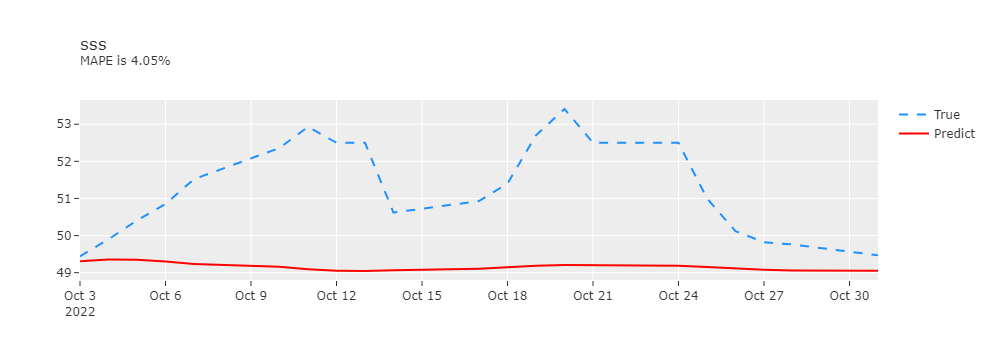

In [144]:
compare_value(y_test, preds, 'sss')

In [151]:
rubber.drop(columns=['ribbed_smoked_sheet', 'cup_lump']).dropna().loc[:'2022-09'].index

DatetimeIndex(['2018-07-02', '2018-07-03', '2018-07-04', '2018-07-05',
               '2018-07-06', '2018-07-09', '2018-07-10', '2018-07-11',
               '2018-07-12', '2018-07-13',
               ...
               '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22',
               '2022-09-23', '2022-09-26', '2022-09-27', '2022-09-28',
               '2022-09-29', '2022-09-30'],
              dtype='datetime64[ns]', name='date', length=1110, freq='B')

In [169]:
arima = ARIMA(order=(2, 2, 4))
arima.fit(y_train, X=rubber.drop(columns=['ribbed_smoked_sheet']).dropna().loc[:'2022-09'])
preds = arima.predict(fh=y_test.index, X=rubber.drop(columns=['ribbed_smoked_sheet']).loc['2022-10'])

ValueError: (time) indices of series 0 are not contained in index of series 0, extra indices are: DatetimeIndex(['2017-09-19', '2017-09-20', '2017-09-21', '2017-09-22',
               '2017-09-25', '2017-09-26', '2017-09-27', '2017-09-28',
               '2017-09-29', '2017-10-02',
               ...
               '2018-06-18', '2018-06-19', '2018-06-20', '2018-06-21',
               '2018-06-22', '2018-06-25', '2018-06-26', '2018-06-27',
               '2018-06-28', '2018-06-29'],
              dtype='datetime64[ns]', name='date', length=204, freq=None)

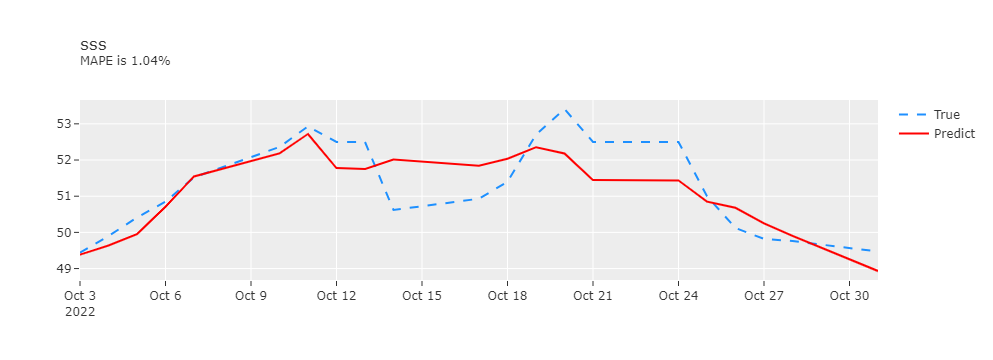

In [164]:
compare_value(y_test, preds, 'sss')